<a href="https://colab.research.google.com/github/stevearonson/VB-Video-Tracking/blob/master/Detectron2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Demo

## Install Detectron2 and dependencies
Follow Detectron2 Tutorial

In [1]:
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 276kB 8.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44091 sha256=4c5ca61398ef89895ef64b9c5d8af85dcfba617487d6a338d766615b3c08bfb1
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5MB 24kB/s 
     |████████████████████████████████| 17.3MB 190kB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.8.0+cu101 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Succes

In [1]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.8")   # please manually install torch 1.8 if Colab changes its default version

1.8.0+cu101 True


In [2]:
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 12506, done.
remote: Total 12506 (delta 0), reused 0 (delta 0), pack-reused 12506
Receiving objects: 100% (12506/12506), 5.21 MiB | 27.52 MiB/s, done.
Resolving deltas: 100% (8957/8957), done.


In [3]:
!ls detectron2/configs/COCO-Detection/

faster_rcnn_R_101_C4_3x.yaml   faster_rcnn_X_101_32x8d_FPN_3x.yaml
faster_rcnn_R_101_DC5_3x.yaml  fast_rcnn_R_50_FPN_1x.yaml
faster_rcnn_R_101_FPN_3x.yaml  retinanet_R_101_FPN_3x.yaml
faster_rcnn_R_50_C4_1x.yaml    retinanet_R_50_FPN_1x.py
faster_rcnn_R_50_C4_3x.yaml    retinanet_R_50_FPN_1x.yaml
faster_rcnn_R_50_DC5_1x.yaml   retinanet_R_50_FPN_3x.yaml
faster_rcnn_R_50_DC5_3x.yaml   rpn_R_50_C4_1x.yaml
faster_rcnn_R_50_FPN_1x.yaml   rpn_R_50_FPN_1x.yaml
faster_rcnn_R_50_FPN_3x.yaml


## Connect to my Google Drive

In [4]:
from google.colab import drive
drive.mount('/gdrive')
vbfolder = r'/gdrive/My Drive/VB/Video/'
!ls "{vbfolder}"

Mounted at /gdrive
 ball_tracker.mp4	      detImages			 Panoptic.jpg
 Cheshire_Halasz_Perin	      image			 panopt.mp4
 Cheshire_Halasz_Perin.pdf    img			 people.mp4
'CHVC M6 S3.mp4'	      input.jpg			 player_pos.csv
 ckpt.t7		      input.mp4			 tracker.mp4
 court-diagram.jpg	      InstanceSegmentation.jpg	 tracker_trails.jpg
 court-diagram-vertical.jpg   Keypoints.jpg		 Untitled.ipynb
 demo.avi		      Keypoints.mkv		 vbdetection2.pth
 Detection.jpg		     'MBVF M7 S3.mp4'		 vbdetection.pth
 Detection.mkv		      misImages			 video-clip.mp4
 DetectionVB2.mkv	      model_final.pth		 video_test.mkv
 DetectionVB.jpg	      new_images		 video_test.mp4
 DetectionVB.mkv	      OpenCV.ipynb		 voc2coco.py


## Try different detectors on same image

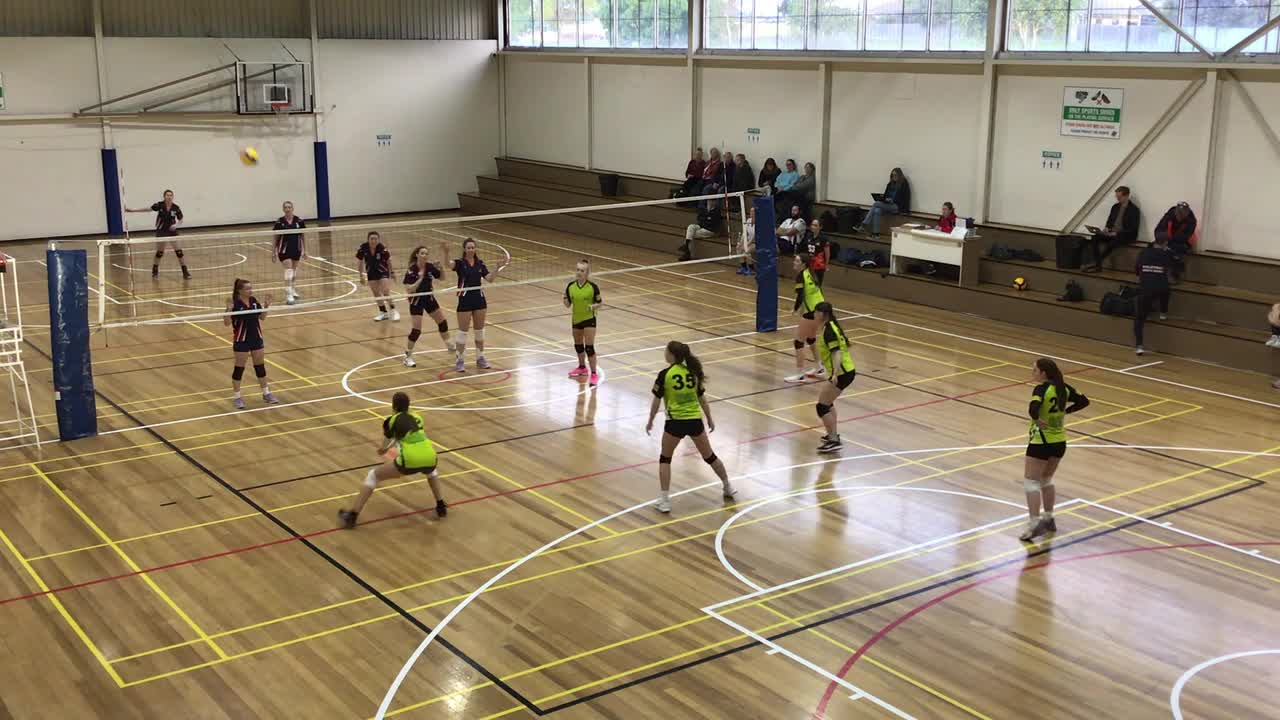

In [5]:
import os, json, cv2
from google.colab.patches import cv2_imshow
im = cv2.imread(vbfolder + "input.jpg")
cv2_imshow(im)

### Object Detection

In [5]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"Detection.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl \

[07/04 16:29:47 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl'], output='/gdrive/My Drive/VB/Video/Detection.jpg', video_input=None, webcam=False)
[07/04 16:29:51 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
model_final_280758.pkl: 167MB [00:07, 21.6MB/s]               
[07/04 16:29:59 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s][07/04 16:30:00 detectron2]: /gdrive/My Drive/VB/Video/input.jpg: detected 21 instances in 0.28s
100% 1/1 [00:00<00:00,  1.43it/s]


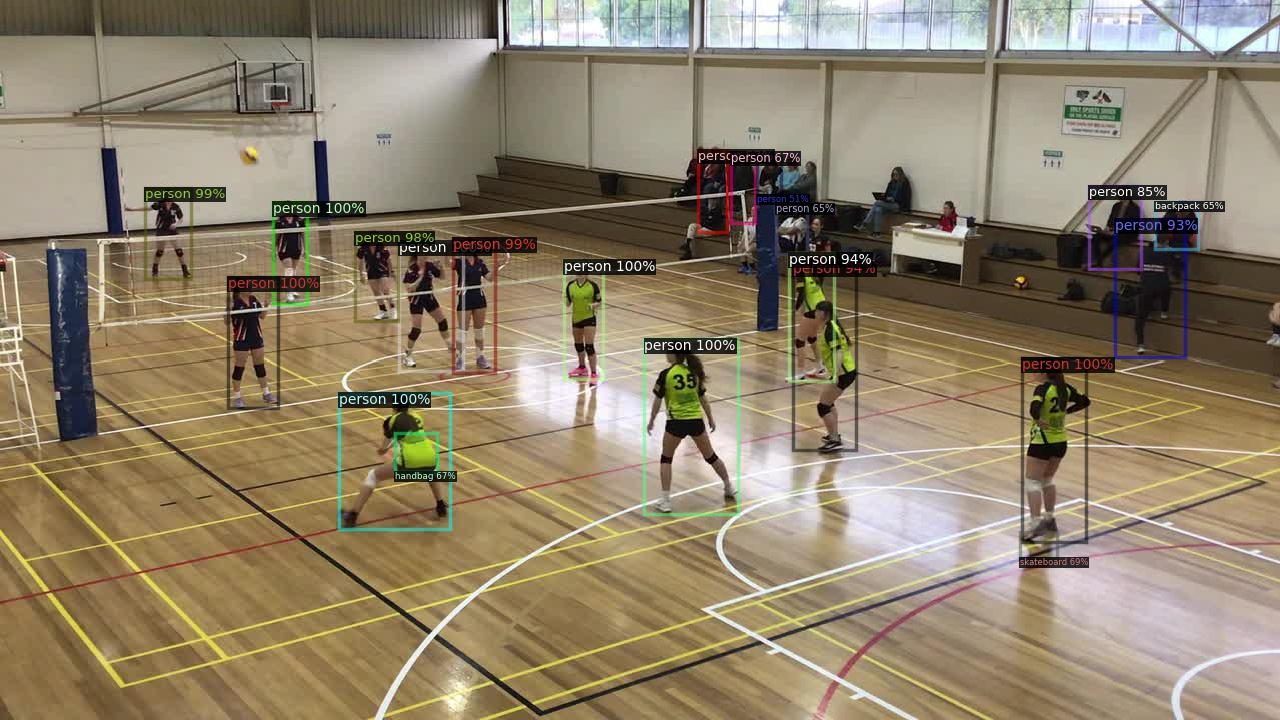

In [6]:
im = cv2.imread(vbfolder + "Detection.jpg")
cv2_imshow(im)

### Instance Segmentation

In [7]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"InstanceSegmentation.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl \

[07/04 16:30:18 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='/gdrive/My Drive/VB/Video/InstanceSegmentation.jpg', video_input=None, webcam=False)
[07/04 16:30:22 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
model_final_f10217.pkl: 178MB [00:09, 18.3MB/s]               
[07/04 16:30:32 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s][07/04 16:30:32 detectron2]: /gdrive/My Drive/VB/Video/input.jpg: detected 26 instances in 0.34s
100% 1/1 [00:00<00:00,  1.25it/s]


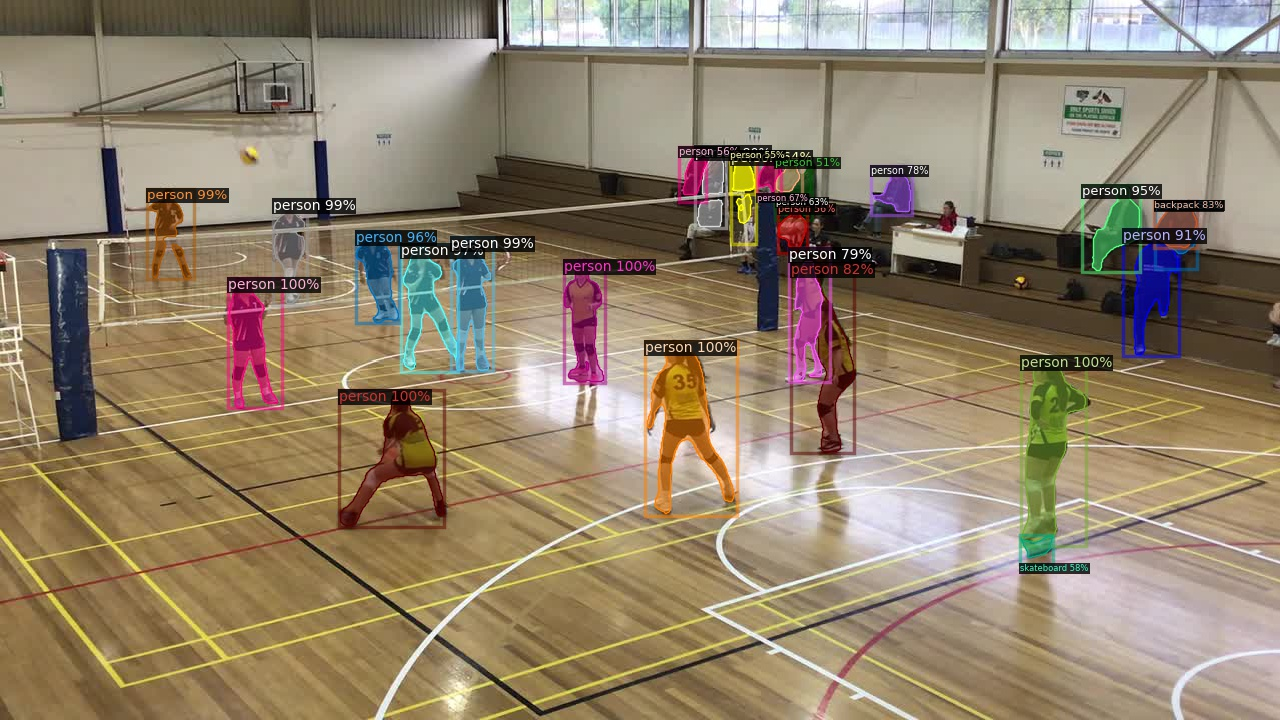

In [8]:
im = cv2.imread(vbfolder + "InstanceSegmentation.jpg")
cv2_imshow(im)

### Keypoint Detection - human pose estimation

In [9]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"Keypoints.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl \

[07/04 16:30:51 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='/gdrive/My Drive/VB/Video/Keypoints.jpg', video_input=None, webcam=False)
[07/04 16:30:55 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
model_final_a6e10b.pkl: 237MB [00:12, 18.3MB/s]               
[07/04 16:31:08 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s][07/04 16:31:09 detectron2]: /gdrive/My Drive/VB/Video/input.jpg: detected 25 instances in 0.47s
100% 1/1 [00:00<00:00,  1.09it/s]


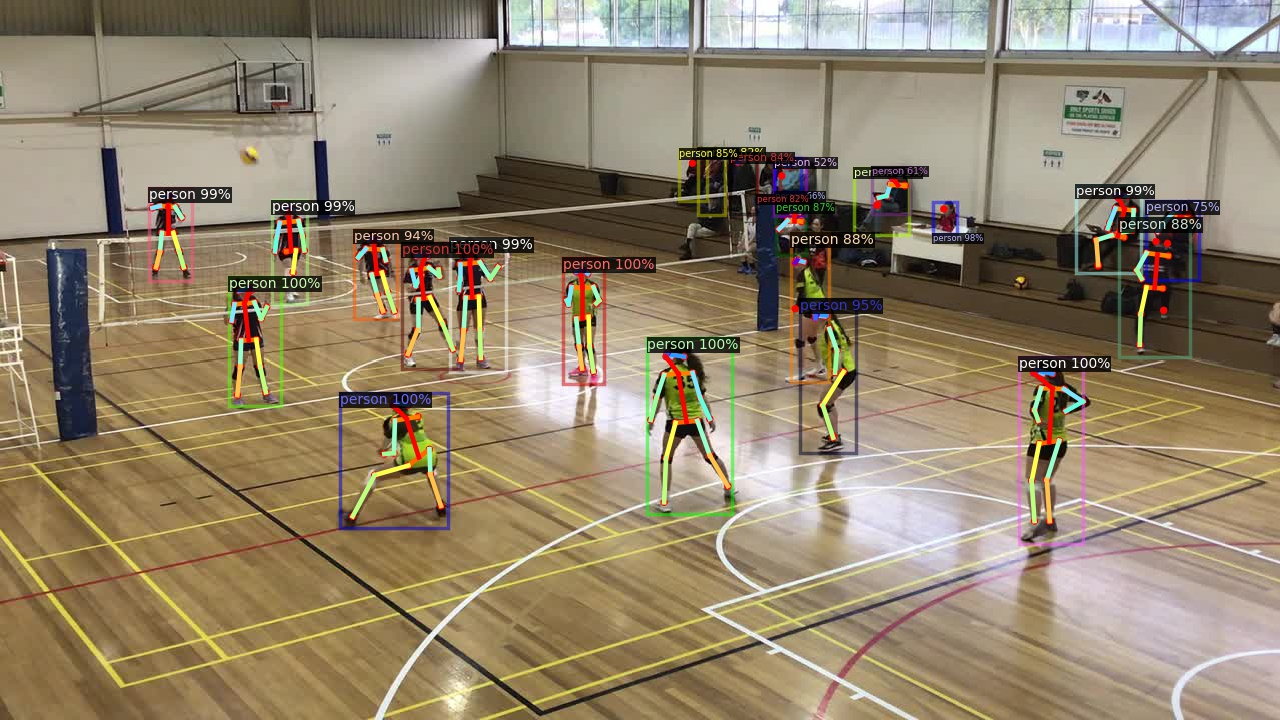

In [10]:
im = cv2.imread(vbfolder + "Keypoints.jpg")
cv2_imshow(im)

### Panoptic Segmentation

In [11]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"Panoptic.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_50_3x/139514569/model_final_c10459.pkl \

[07/04 16:31:22 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_50_3x/139514569/model_final_c10459.pkl'], output='/gdrive/My Drive/VB/Video/Panoptic.jpg', video_input=None, webcam=False)
[07/04 16:31:26 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_50_3x/139514569/model_final_c10459.pkl
model_final_c10459.pkl: 184MB [00:10, 18.4MB/s]               
[07/04 16:31:36 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s][07/04 16:31:37 detectron2]: /gdrive/My Drive/VB/Video/input.jpg: detected 23 instances in 0.66s
100% 1/1 [00:01<00:00,  1.44s/it]


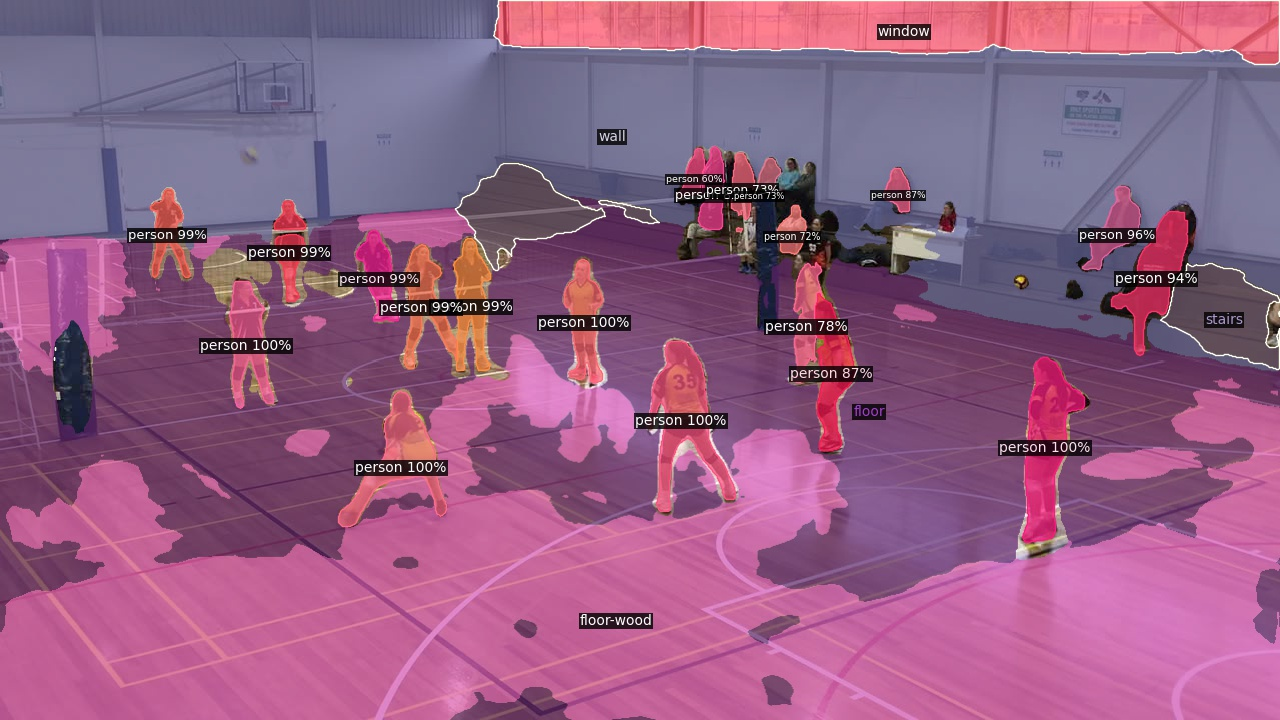

In [12]:
im = cv2.imread(vbfolder + "Panoptic.jpg")
cv2_imshow(im)

## Video detection

In [1]:
# Use keypoints on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"Detection.mkv \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl

python3: can't open file 'detectron2/demo/demo.py': [Errno 2] No such file or directory


In [18]:
# Use detection only on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"Detection.mkv \
    --opts MODEL.WEIGHTS detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl \

[07/04 16:44:45 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl'], output='/gdrive/My Drive/VB/Video/Detection.mkv', video_input='/gdrive/My Drive/VB/Video/input.mp4', webcam=False)
[07/04 16:44:49 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
[07/04 16:44:49 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
Could not find encoder for codec id 27: Encoder not found
[ERROR:0] global /io/opencv/modules/videoio/src/cap.cpp (392) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.1.2) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /tmp/video_format_testgixxdxly/test_file.mkv i

# Custom Train on Volleyball Image Dataset

In [ ]:
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer



In [ ]:
register_coco_instances("volleyball", {}, vbfolder + 'img/output.json', vbfolder + 'img')

In [ ]:
ball_metadata = MetadataCatalog.get("volleyball")
dataset_dicts = DatasetCatalog.get("volleyball")

In [ ]:
ball_metadata

In [ ]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("volleyball",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")   # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
#cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 2000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

In [ ]:
# save trained model weights to video directoruy
!mv -f ./output/model_final.pth "{vbfolder}"vbdetection.pth

In [ ]:
!ls "{vbfolder}"

In [ ]:
!ls output

In [ ]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"DetectionVB.jpg \
    --opts MODEL.WEIGHTS "{vbfolder}"vbdetection.pth \
    DATASETS.TEST "('volleyball', )" \
    MODEL.ROI_HEADS.NUM_CLASSES 1


In [ ]:
im = cv2.imread(vbfolder + "DetectionVB.jpg")
cv2_imshow(im)

In [ ]:
# Use detection only on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"DetectionVB.mkv \
    --opts MODEL.WEIGHTS "{vbfolder}"vbdetection.pth \
    DATASETS.TEST "('volleyball', )" \
    MODEL.ROI_HEADS.NUM_CLASSES 1


In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TEST = ("volleyball",)
cfg.MODEL.WEIGHTS = vbfolder + "vbdetection.pth"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold for this model

predictor = DefaultPredictor(cfg)

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd

In [ ]:
cap = cv2.VideoCapture(vbfolder + "input.mp4")
detImageFolder = vbfolder + "detImages/"

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = cap.get(cv2.CAP_PROP_FPS)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(width, height, frames_per_second, num_frames)

bbox_xcycwh = []
for ix in tqdm(range(num_frames)):
    ret, frame = cap.read()
    if not ret:
        break

    outputs = predictor(frame)

    boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
    if len(boxes) > 0:
        # save image to detected images
        cv2.imwrite(detImageFolder+"det"+str(ix)+".jpg", frame)

        boxes_xcycwh = np.array([(boxes[:,0] + boxes[:,2])/(2*width), 
                                 (boxes[:,1] + boxes[:,3])/(2*height), 
                                 (boxes[:,2] - boxes[:,0])/width, 
                                 (boxes[:,3] - boxes[:,1])/height]).T

        # add category id in fromt of box cordinates
        boxes_xcycwh = np.insert(boxes_xcycwh, 0, 0, axis=1)
        np.savetxt(detImageFolder+"det"+str(ix)+".txt", boxes_xcycwh, fmt="%d %8.4f %8.4f %8.4f %8.4f", newline="\r\n")

        for box in boxes:
            x0, y0, x1, y1 = box
            bbox_xcycwh.append([ix, (x1 + x0) / (2*width), (y1 + y0) / (2*height), (x1 - x0)/width, (y1 - y0)/height])

cap.release()


In [ ]:
pd.DataFrame(bbox_xcycwh, columns=['Image', 'Xcenter', 'Ycenter', 'Width', 'Height'])

# Additional Custom Training

In [ ]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("volleyball",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = vbfolder + "vbdetection.pth"
cfg.SOLVER.IMS_PER_BATCH = 2
#cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 2000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

In [ ]:
# save trained model weights to video directoruy
!mv -f ./output/model_final.pth "{vbfolder}"vbdetection2.pth

In [ ]:
# Use detection only on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"DetectionVB2.mkv \
    --opts MODEL.WEIGHTS "{vbfolder}"vbdetection2.pth \
    DATASETS.TEST "('volleyball', )" \
    MODEL.ROI_HEADS.NUM_CLASSES 1


In [ ]:
# Use detection only on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"video_test.mp4 \
    --output "{vbfolder}"video_test.mkv \
    --opts MODEL.WEIGHTS "{vbfolder}"vbdetection2.pth \
    DATASETS.TEST "('volleyball', )" \
    MODEL.ROI_HEADS.NUM_CLASSES 1
